> <h1 style = "text-align: center ">Diamond Price Predictions</h1>

> <a  style = "test-align: center">By- </a><a href = "">Gautam Sharma</a>
---

> ## Import all require libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

* No of attributes : 10
    * `Price` : Price in US dollers
    * `carat` : Weight of diamonds
    * `cut` : Quality of the cut (Fair, good, very good, premium, ideal)
    * `color` : Diamond color, from J(Worst) to D(Best)
    * `Clarity`: A measurement of hoe clear the diamond in (I1(worst), SI2, SI1,VS2,VS1,VVS2,VVS1,IF(best))
    * `x`: length in mm
    * `y`: width in mm
    * `z`: Depth in mm
    * `depth` : Tota depth percentage = z/mean(x,y) = 2*z/(x+y)
    * `table`|: width of the top of the diamond relative to the widest poit

In [4]:
diamonds.shape

(53940, 10)

> We found our dataset has 53940 rows and 10 columns

In [5]:
# checking statistics of the numerical variables of the datasets
diamonds_stats = diamonds.describe(include = 'all')
diamonds_stats.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.539635,0.703869,0.0,2.91,3.53,4.04,31.8


* maximum value of carat : 5.01
    - 75 percentile is close to 1
    - standard deviation 0.47
    

# Dealing with  missing values

In [6]:
# examine the values of x that are equal to zero:
diamonds.loc[diamonds['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


> - some of the diamonds with the value of zero in x also have zeros in the other
dimensions. Although the actual value is zero, it makes more sense to consider these as
missing values, since in this context, zero is not an admissible value.

In [7]:
# Let's check x & y are greather than zero
diamonds = diamonds.loc[(diamonds['x'] > 0 ) | (diamonds['y'] > 0)]

In [8]:
diamonds.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table       56.0
price       4954
x            0.0
y           6.62
z            0.0
Name: 11182, dtype: object

In [9]:
# Replace the missing values with median 
diamonds.loc[11182, 'x'] = diamonds['x'].median()

In [10]:
diamonds.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table       56.0
price       4954
x            5.7
y           6.62
z            0.0
Name: 11182, dtype: object

In [11]:
diamonds.loc[diamonds['x'] == 0].shape

(0, 10)

In [12]:
diamonds.loc[diamonds['y'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
diamonds.loc[diamonds['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,5.7,6.62,0.0


In [14]:
# Now z 0 is replce with median
diamonds.loc[11182,'z'] = diamonds['z'].median()

In [15]:
diamonds.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table       56.0
price       4954
x            5.7
y           6.62
z           3.53
Name: 11182, dtype: object

In [16]:
diamonds.loc[(diamonds['y'] > 30) | (diamonds['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [17]:
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]

> * We are done with our data preparation of the numerical variables of this dataset. Of course, in reality, it will take a lot more effort and time on your part to have a clean dataset to work with; this was just a mini-example. In addition, we still have to address the three   categorical variables in our dataset: cut, clarity, and color.
---

> # Explorarory Data Analysis
---

> ## Univariate EDA
---

In [18]:
import seaborn as sns
%matplotlib inline

In [19]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'],prefix='cut',drop_first = True)], axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'],prefix='color',drop_first = True)], axis = 1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'],prefix='clarity',drop_first = True)], axis = 1)

In [20]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,1,0,0,1,0,0,0,0


In [21]:
# We create to lists contains names of the features

numerical_features = ['price','carat','depth','table','x','y','z']
categorical_features = ['cut','color','clarity']

In [22]:
def desc_num_feature(feature_name, bins=30, edgecolor='r', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=14)
    plt.figtext(1,0.15,diamonds[feature_name].describe().all(),size = 20)

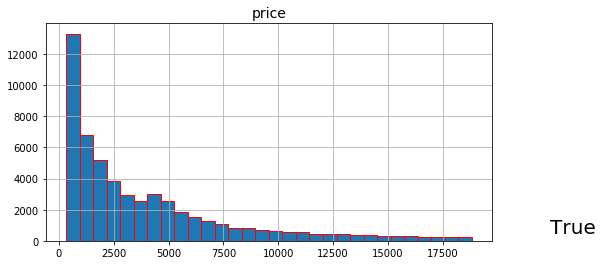

In [23]:
desc_num_feature('price')

> - bin_size = (18823 - 326) / 30  = 615
--

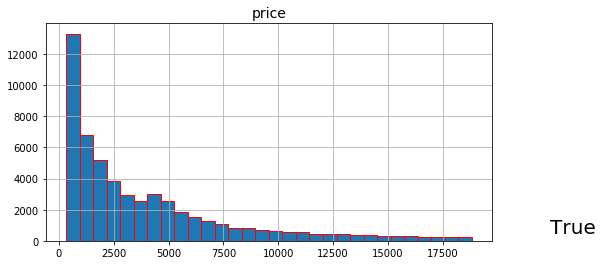

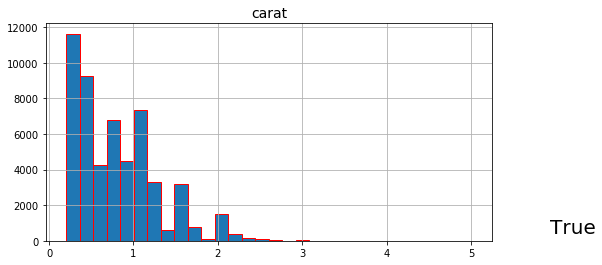

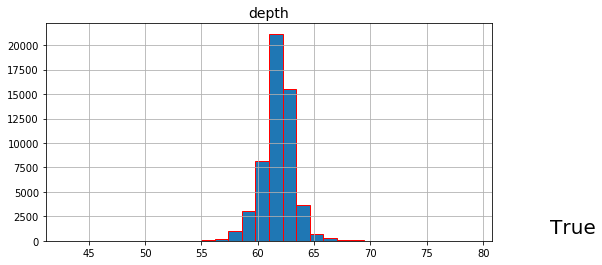

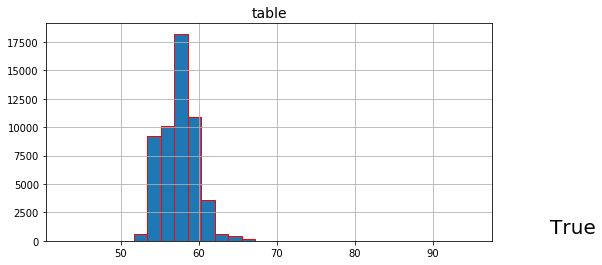

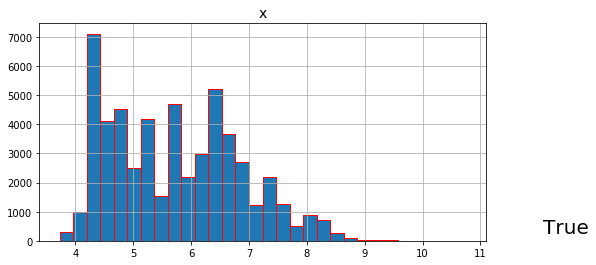

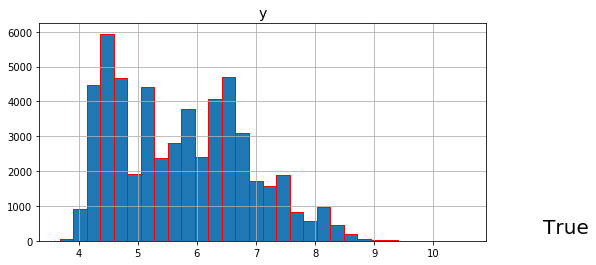

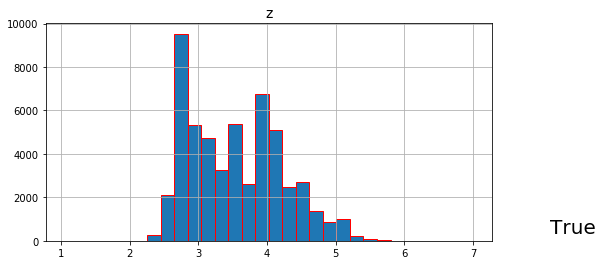

In [24]:
for x in numerical_features:
    desc_num_feature(x)

In [25]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df = pd.DataFrame({'count':count,'percent':percent.round(1)})
print(df)

           count  percent
Ideal      21549     40.0
Premium    13788     25.6
Very Good  12080     22.4
Good        4904      9.1
Fair        1609      3.0


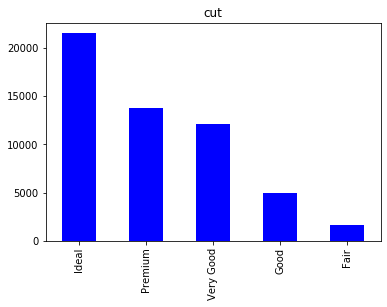

In [26]:
count.plot(kind='bar',title = feature,color = 'b');

In [27]:
# Replicate the code for color
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)

   count  percent
G  11290     20.9
E   9795     18.2
F   9540     17.7
H   8301     15.4
D   6774     12.6
I   5422     10.1
J   2808      5.2


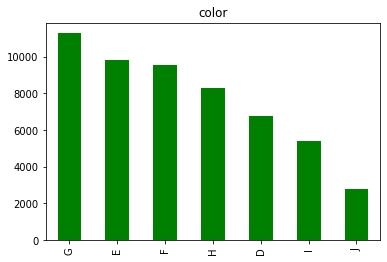

In [28]:
count.plot(kind='bar',title = feature, color = 'g');

In [29]:
#nCheck clarity feature
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100 * diamonds[feature].value_counts(normalize = True)
df = pd.DataFrame({'count':count,'percent':percent.round(2)})
df

,count,percent
SI1,13065,24.23
VS2,12256,22.73
SI2,9190,17.04
VS1,8168,15.15
VVS2,5066,9.39
VVS1,3654,6.78
IF,1790,3.32
I1,741,1.37


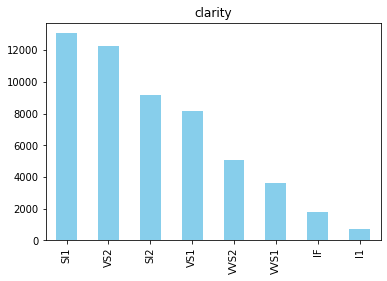

In [30]:
count.plot(kind = 'bar',title=feature, color = 'skyblue');

> - We now have a clear picture of which categories of diamonds are more and less common for each cut,color, and clarity. We are gaining more understanding about our dataset.
---

> # Bivariate EDA.
---

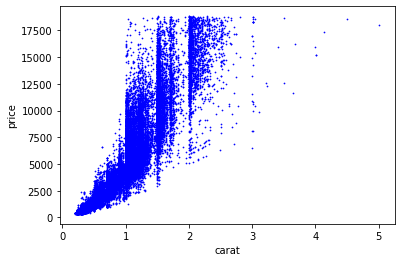

In [31]:
diamonds.plot.scatter(x = 'carat',y='price',s = 0.5, color = 'blue');

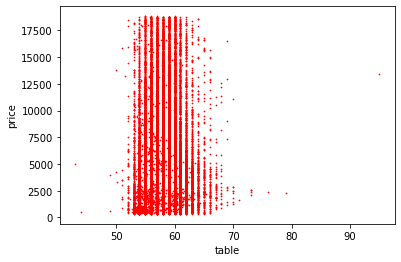

In [32]:
diamonds.plot.scatter(x='table',y='price',s = 0.5, color = 'r');

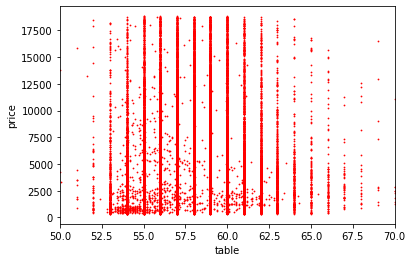

In [33]:
# Zoom the above plot
diamonds.plot.scatter(x='table',y='price',s = 0.6,color = 'r', xlim = (50,70));

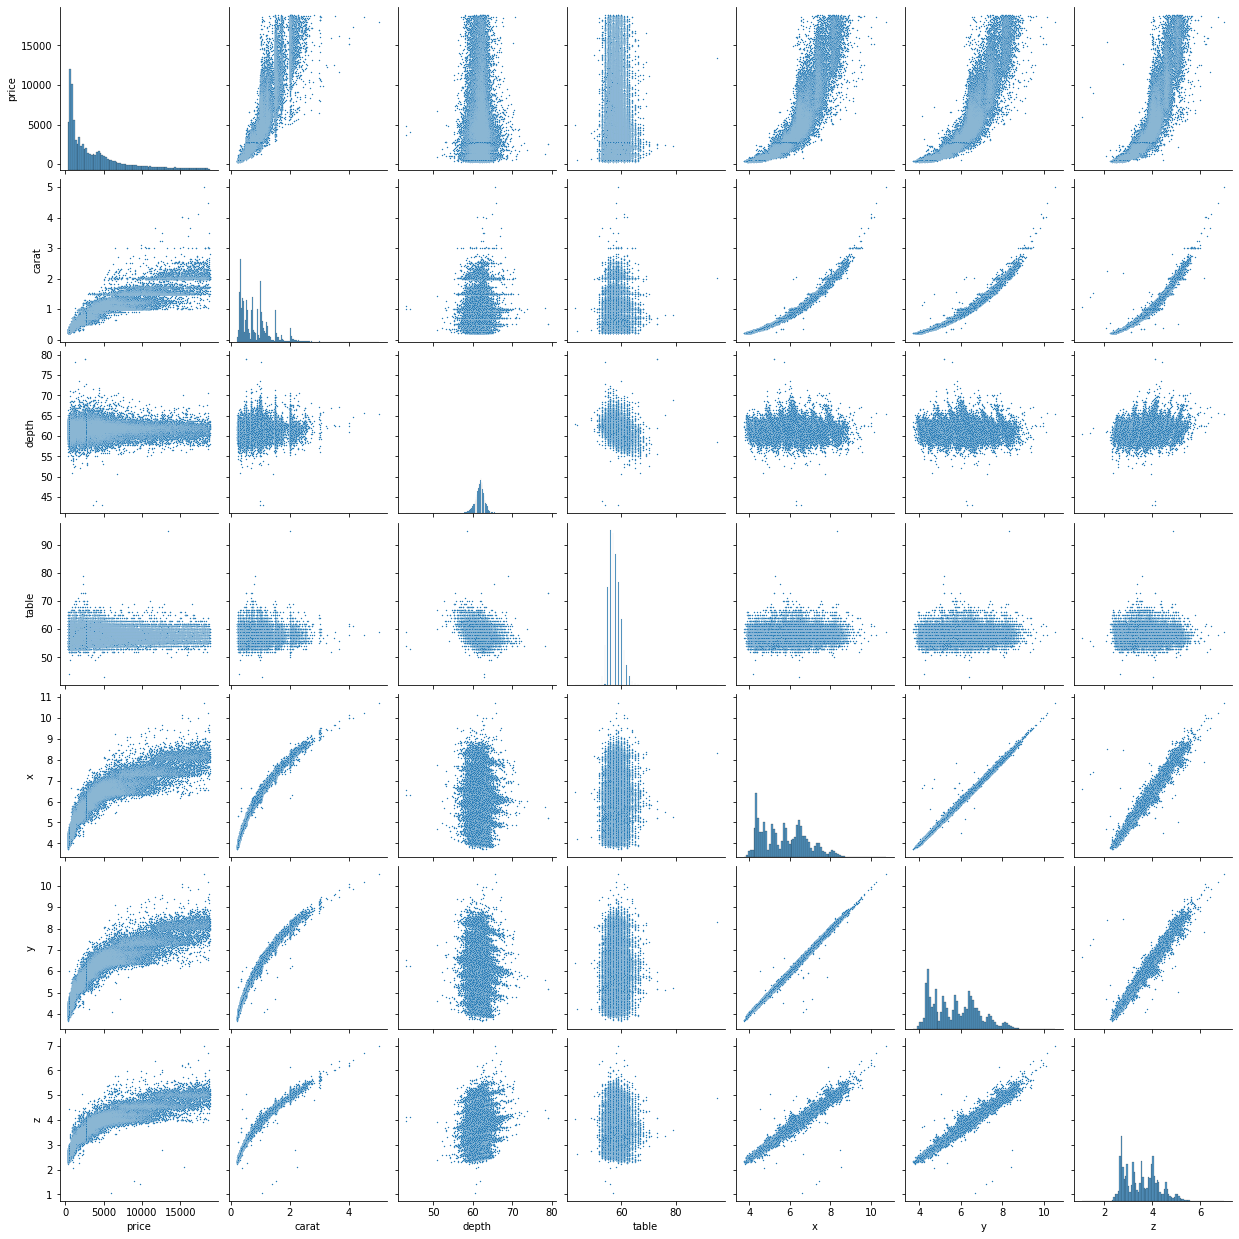

In [34]:
sns.pairplot(diamonds[numerical_features], plot_kws = {'s':2});

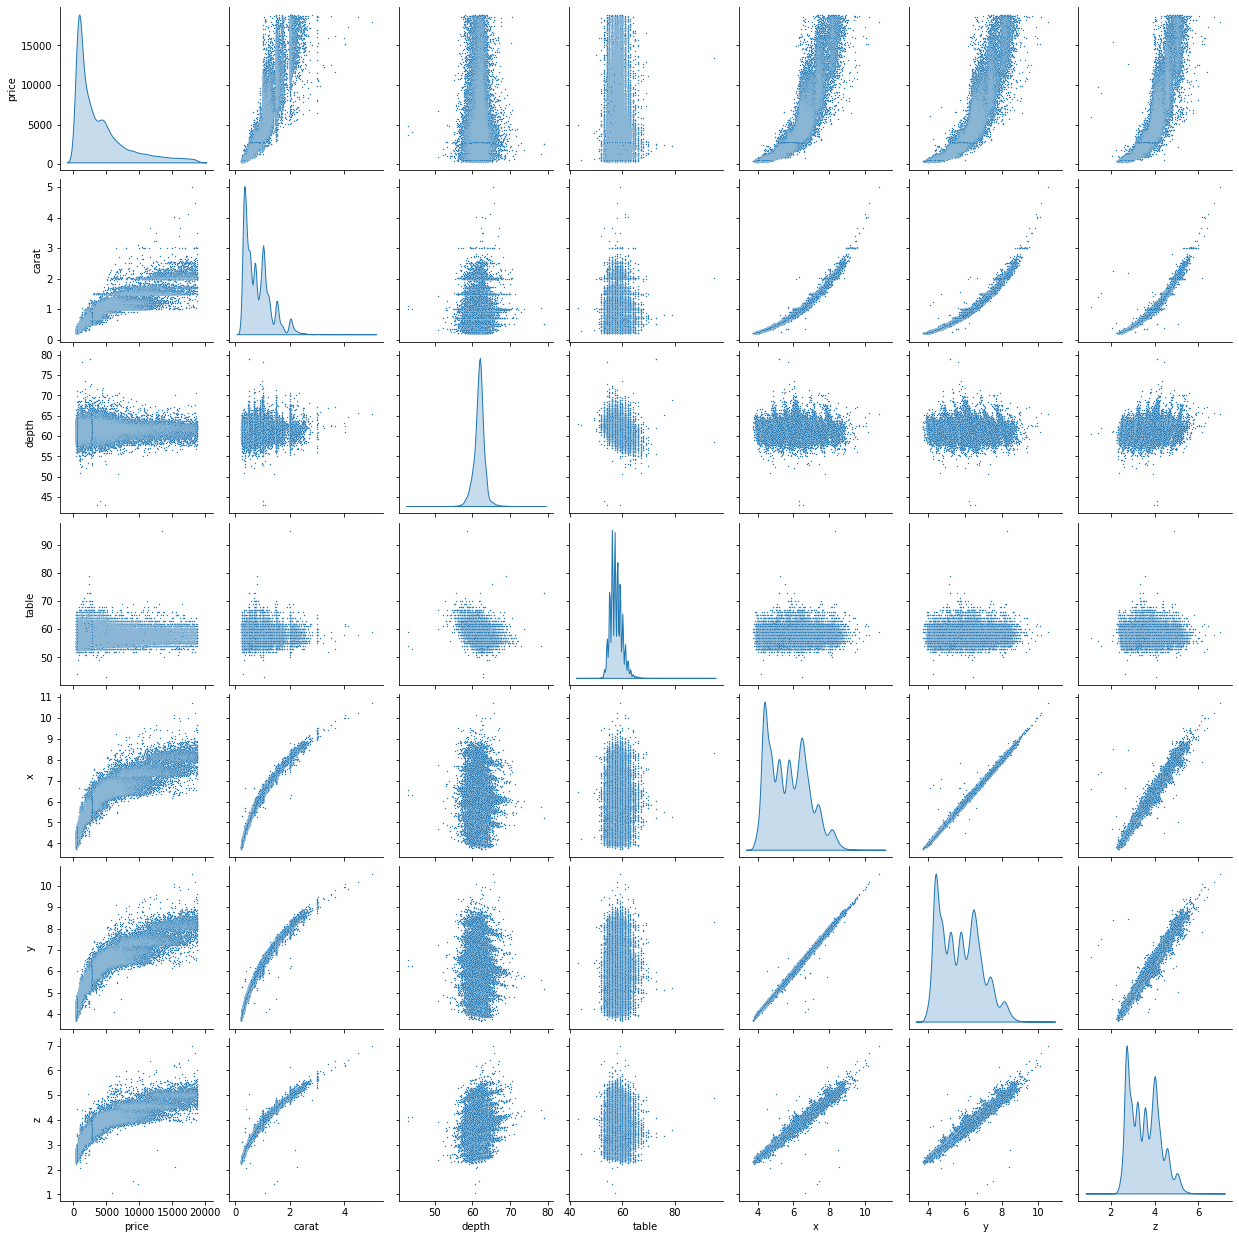

In [35]:
sns.pairplot(diamonds[numerical_features], plot_kws = {'s':2}, diag_kind = 'kde');

In [36]:
diamonds[numerical_features].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921603,-0.010595,0.127157,0.887216,0.888810,0.881724
carat,0.921603,1.000000,0.028317,0.181650,0.977761,0.976844,0.976028
depth,-0.010595,0.028317,1.000000,-0.295722,-0.025020,-0.028151,0.096707
table,0.127157,0.181650,-0.295722,1.000000,0.196129,0.189964,0.155849
x,0.887216,0.977761,-0.025020,0.196129,1.000000,0.998652,0.990758
y,0.888810,0.976844,-0.028151,0.189964,0.998652,1.000000,0.990414
z,0.881724,0.976028,0.096707,0.155849,0.990758,0.990414,1.000000


In [37]:
# dimension and carat
dim_features = diamonds[['carat','x','y','z']]

In [38]:
dim_features.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.23,4.05,4.07,2.31
3,0.29,4.20,4.23,2.63
4,0.31,4.34,4.35,2.75


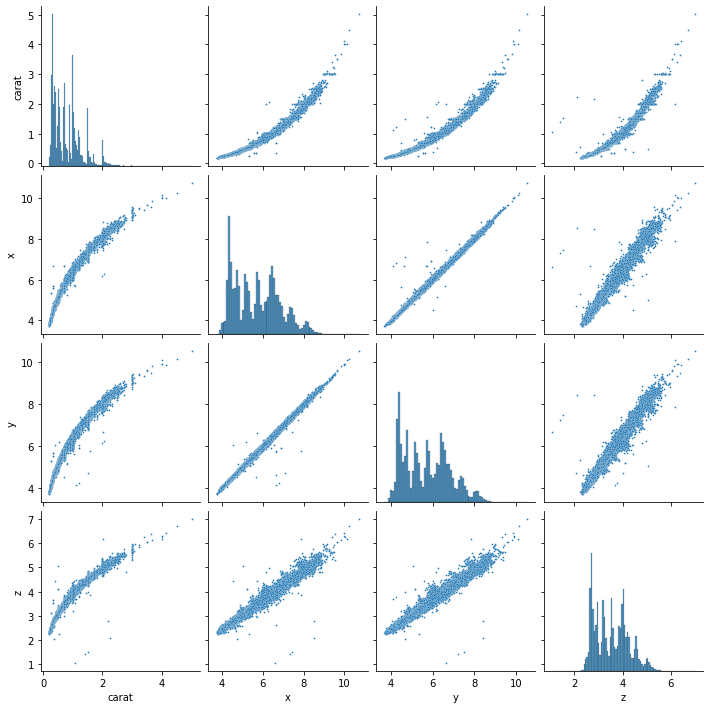

In [39]:
sns.pairplot(dim_features, plot_kws = {'s':3});

In [40]:
dim_features.corr()

,carat,x,y,z
carat,1.000000,0.977761,0.976844,0.976028
x,0.977761,1.000000,0.998652,0.990758
y,0.976844,0.998652,1.000000,0.990414
z,0.976028,0.990758,0.990414,1.000000


In [41]:
pd.crosstab(diamonds['cut'], diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,313,303,175,119
Good,662,933,907,871,702,522,307
Ideal,2834,3902,3826,4883,3115,2093,896
Premium,1602,2337,2331,2924,2358,1428,808
Very Good,1513,2399,2164,2299,1823,1204,678


> - we can clearly see the counts, but, honestly, it is hard to detect if there in any relationship between these features.

In [42]:
# Caluculate the `margins`

ct = pd.crosstab(diamonds['cut'], diamonds['color'], margins=True, margins_name='Total')

In [43]:
ct

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,163,224,312,313,303,175,119,1609
Good,662,933,907,871,702,522,307,4904
Ideal,2834,3902,3826,4883,3115,2093,896,21549
Premium,1602,2337,2331,2924,2358,1428,808,13788
Very Good,1513,2399,2164,2299,1823,1204,678,12080
Total,6774,9795,9540,11290,8301,5422,2808,53930


In [44]:
# Now devide the total from each columns se proportin of diamonds in percent

100 * ct.div(ct['Total'], axis = 0).round(3)

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,10.1,13.9,19.4,19.5,18.8,10.9,7.4,100.0
Good,13.5,19.0,18.5,17.8,14.3,10.6,6.3,100.0
Ideal,13.2,18.1,17.8,22.7,14.5,9.7,4.2,100.0
Premium,11.6,16.9,16.9,21.2,17.1,10.4,5.9,100.0
Very Good,12.5,19.9,17.9,19.0,15.1,10.0,5.6,100.0
Total,12.6,18.2,17.7,20.9,15.4,10.1,5.2,100.0


> - I multiplied by 100 only to make the numbers easier to read as percentages. The bottom row indicates that the overall proportion of diamonds of different colors is independent of their cut. This is also called the marginal frequency of colors: 12.6% are color D, 18.2% are color E, and so on

> # Barplots for two categorical variables
---

In [45]:
basic_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
basic_ct

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,313,303,175,119
Good,662,933,907,871,702,522,307
Ideal,2834,3902,3826,4883,3115,2093,896
Premium,1602,2337,2331,2924,2358,1428,808
Very Good,1513,2399,2164,2299,1823,1204,678


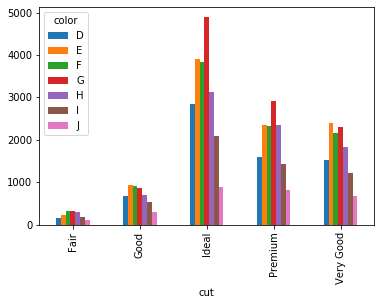

In [46]:
basic_ct.plot(kind='bar');

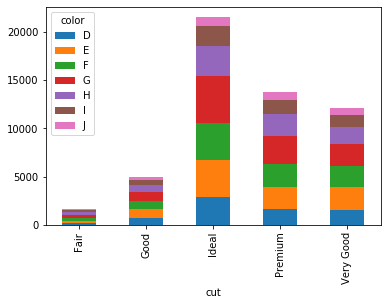

In [47]:
basic_ct.plot(kind = 'bar', stacked = True);

In [48]:
ct1 = ct.div(ct['Total'], axis = 0).iloc[:,:-1]

In [49]:
ct1

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,0.101305,0.139217,0.193909,0.194531,0.188316,0.108763,0.073959
Good,0.134992,0.190253,0.184951,0.177610,0.143148,0.106444,0.062602
Ideal,0.131514,0.181076,0.177549,0.226600,0.144554,0.097127,0.041580
Premium,0.116188,0.169495,0.169060,0.212068,0.171018,0.103568,0.058602
Very Good,0.125248,0.198593,0.179139,0.190315,0.150911,0.099669,0.056126
Total,0.125607,0.181624,0.176896,0.209345,0.153922,0.100538,0.052067


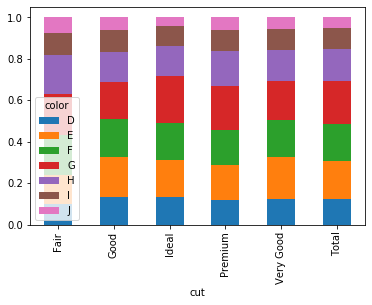

In [50]:
ct1.plot(kind='bar',stacked = True);

> # One numerical feature and one categorial feature
---

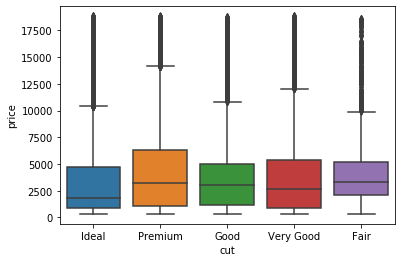

In [51]:
sns.boxplot(x = 'cut',y = 'price', data=diamonds);

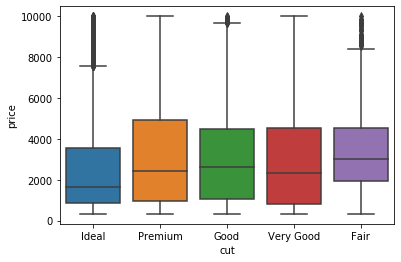

In [52]:
# Here we focus on the costing less tha $10000
sns.boxplot(x = 'cut',y = 'price', data=diamonds.loc[diamonds['price']<10000]);

*  The price distributions for Premium,Good and Very Good cuts are very similar.

In [53]:
# Calculate the numerical calcultions
diamonds.groupby('cut')['price'].agg(np.median).sort_values()

cut
Ideal        1810
Very Good    2648
Good         3054
Premium      3183
Fair         3282
Name: price, dtype: int64

In [54]:
# Calculate the median price for eah category of clarity
medians_by_clarity = diamonds.groupby('clarity')['price'].agg(np.median).sort_values()
medians_by_clarity

clarity
IF      1080.0
VVS1    1092.5
VVS2    1311.0
VS1     2005.0
VS2     2053.0
SI1     2822.0
I1      3344.0
SI2     4072.0
Name: price, dtype: float64

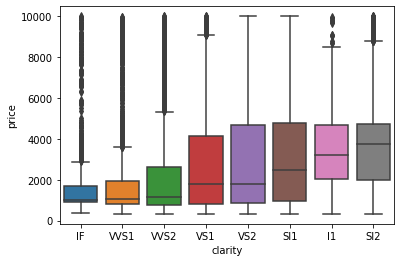

In [55]:
sns.boxplot(x = 'clarity',y ='price', data= diamonds.loc[diamonds['price'] < 10000], order = medians_by_clarity.index);

> # Creating ML Model
---

In [56]:
w = np.mean(diamonds['price']/diamonds['carat'])

In [57]:
w

4008.0243030179727

> ## Price = 4008.024 x carat
---

In [58]:
def first_ml_model(carat):
    return 4008.024 * carat

In [59]:
# Prediction for some examples
carat_values = np.arange(0.5, 5.5, 0.5)
preds = first_ml_model(carat_values)

In [60]:
pd.DataFrame({'Carat':carat_values, 'Predicted Price': preds})

,Carat,Predicted Price
0,0.5,2004.012
1,1.0,4008.024
2,1.5,6012.036
3,2.0,8016.048
4,2.5,10020.060
5,3.0,12024.072
6,3.5,14028.084
7,4.0,16032.096
8,4.5,18036.108
9,5.0,20040.120


In [61]:
x = diamonds.drop(['cut','color','clarity','price'], axis = 1)
y = diamonds['price']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 123)

In [64]:
x_train.shape, y_train.shape

((48537, 23), (48537,))

In [65]:
x_test.shape, y_test.shape

((5393, 23), (5393,))

# Dimensionality reduction using PCA(Principal Component Analysis)

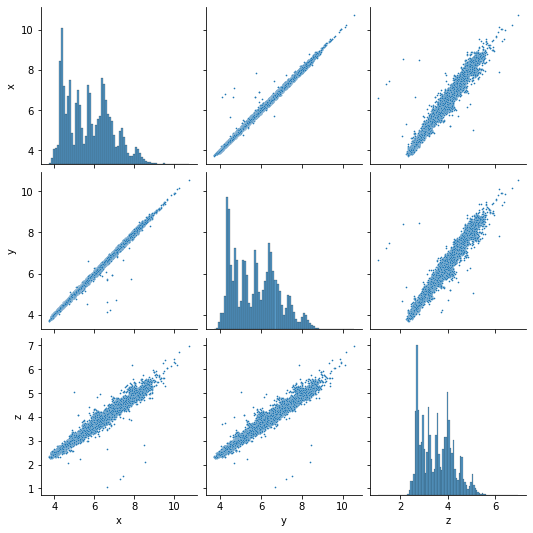

In [66]:
sns.pairplot(x_train[['x','y','z']], plot_kws = {'s':3});

In [67]:
# Import pCA
from sklearn.decomposition import PCA

In [68]:
# Create an instance of the class
pca = PCA(n_components = 3, random_state = 123)

In [69]:
# Use the fit method of the instance
pca.fit(x_train[['x','y','z']])

PCA(n_components=3, random_state=123)

In [70]:
# Use the transformer method to perform the transformation
princ_comp = pca.transform(x_train[['x','y','z']])

In [71]:
pca.explained_variance_ratio_.round(3)

array([0.997, 0.002, 0.001])

> * 99.7% of the variance on the original three features is captured by the first principal component; the rest of the variance is captured mostly by the second component (0.2%), and the third one captures virtually nothing. Given these results, I think it would be a good idea to preserve only the first PC, which will be a sort of size index of the diamond

In [72]:
princ_comp = pd.DataFrame(data = princ_comp, columns=['pca1','pca2','pca3'])

In [73]:
princ_comp.head()

,pca1,pca2,pca3
0,-1.580536,-0.089365,0.024878
1,1.460102,-0.037511,-0.047461
2,-0.978727,-0.000295,-0.009651
3,1.563535,0.059451,0.033160
4,3.694613,0.213991,0.038002


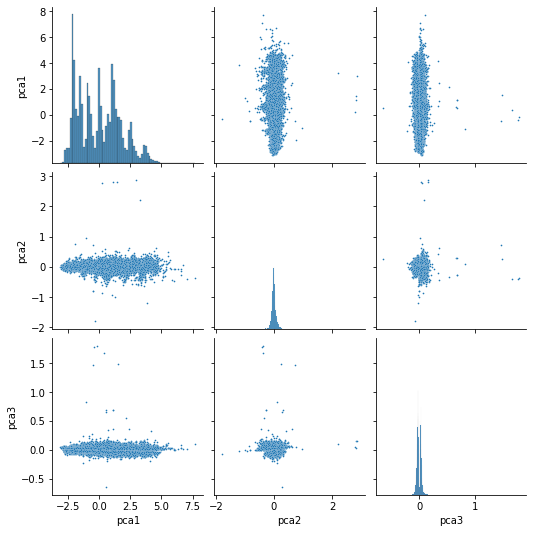

In [74]:
sns.pairplot(princ_comp, plot_kws={'s':3});

In [75]:
princ_comp.corr().round()

,pca1,pca2,pca3
pca1,1.0,0.0,-0.0
pca2,0.0,1.0,-0.0
pca3,-0.0,-0.0,1.0


In [76]:
# Get only the first primcipal component
pca = PCA(n_components = 1, random_state = 123)


In [77]:
# Train the pca transformer
pca.fit(x_train[['x','y','z']])

PCA(n_components=1, random_state=123)

In [78]:
# Add the new feature to the dataset
x_train['dim_index'] = pca.transform(x_train[['x','y','z']]).flatten()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
x_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dim_index
30066,0.40,63.8,57.0,4.70,4.67,2.99,1,0,0,0,...,0,0,0,0,1,0,0,0,0,-1.580536
17608,1.12,62.3,53.0,6.64,6.70,4.16,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1.460102
42508,0.50,61.8,57.0,5.09,5.11,3.15,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-0.978727
22842,1.14,60.8,58.0,6.79,6.74,4.11,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.563535
25957,2.01,58.9,63.0,8.22,8.16,4.82,0,0,0,1,...,1,0,0,1,0,0,0,0,0,3.694613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15378,0.35,63.6,56.0,4.53,4.50,2.87,1,0,0,0,...,1,0,0,1,0,0,0,0,0,-1.848875
17732,1.03,61.7,56.0,6.49,6.54,4.02,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1.203239
28036,0.30,61.8,56.0,4.29,4.32,2.66,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-2.205182
15726,1.00,62.3,58.0,6.39,6.30,3.95,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.955220


In [80]:
# Drop x, y,z
x_train.drop(['x','y','z'], axis = 1, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
x_train.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dim_index
30066,0.40,63.8,57.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-1.580536
17608,1.12,62.3,53.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.460102
42508,0.50,61.8,57.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,-0.978727
22842,1.14,60.8,58.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.563535
25957,2.01,58.9,63.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,3.694613


# Standardization - Centering and Scaling

In [82]:
numerical_features = ['carat','depth','table','dim_index']

In [83]:
# Import the claas that will be use here
from sklearn.preprocessing import StandardScaler

In [84]:
# Create an instance of the class
scaler = StandardScaler()

In [85]:
# Use the fit method of the instance
scaler.fit(x_train[numerical_features])

StandardScaler()

In [86]:
# Use the transform method to perform the transformation
x_train.loc[:,numerical_features] = scaler.transform(x_train[numerical_features])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [87]:
x_train[numerical_features].head()

,carat,depth,table,dim_index
30066,-0.840293,1.429309,-0.205642,-0.918724
17608,0.677534,0.383359,-2.001069,0.848719
42508,-0.629484,0.034709,-0.205642,-0.568908
22842,0.719696,-0.662591,0.243215,0.908842
25957,2.553737,-1.987460,2.487499,2.147581


In [88]:
x_train[numerical_features].tail()

,carat,depth,table,dim_index
15378,-0.945698,1.289849,-0.654498,-1.074702
17732,0.487806,-0.035021,-0.654498,0.699411
28036,-1.051102,0.034709,-0.654498,-1.281814
15726,0.424563,0.383359,0.243215,0.555244
52744,-0.186784,0.453089,-1.103355,-0.000449


In [89]:
x_train[numerical_features].describe().round(2)

,carat,depth,table,dim_index
count,48537.00,48537.00,48537.00,48537.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.26,-13.07,-6.49,-1.82
25%,-0.84,-0.52,-0.65,-0.91
50%,-0.21,0.03,-0.21,-0.02
75%,0.51,0.52,0.69,0.71
max,8.88,12.03,9.67,4.50


# ML Model
---

In [90]:
# Import the Estimator class
from sklearn.linear_model import LinearRegression

In [91]:
# Create an instances of the class
ml_reg = LinearRegression()

In [92]:
# Use the fit method of the instance
ml_reg.fit(x_train,y_train)

LinearRegression()

In [93]:
# Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(x_train)

In [94]:
pd.Series(ml_reg.coef_, index = x_train.columns).sort_values(ascending = False).round(2)

carat            5422.04
clarity_IF       5384.93
clarity_VVS1     5040.24
clarity_VVS2     4993.61
clarity_VS1      4616.93
clarity_VS2      4303.06
clarity_SI1      3704.82
clarity_SI2      2740.18
cut_Ideal         856.23
cut_Premium       756.77
cut_Very Good     756.17
cut_Good          609.70
table             -59.04
depth             -80.63
color_E          -217.07
color_F          -276.78
color_G          -489.66
color_H          -991.01
dim_index       -1235.23
color_I         -1480.56
color_J         -2384.35
dtype: float64

In [95]:
ml_reg.fit(x_train.drop('carat',axis = 1), y_train)


LinearRegression()

In [96]:
pd.Series(ml_reg.coef_, index = x_train.drop('carat',axis=1).columns).sort_values(ascending=False).round(2)

clarity_IF       5148.67
clarity_VVS1     4790.55
clarity_VVS2     4598.87
dim_index        4037.32
clarity_VS1      4006.20
clarity_VS2      3711.01
clarity_SI1      2975.99
clarity_SI2      2210.70
cut_Premium       934.69
cut_Ideal         923.11
cut_Very Good     811.81
cut_Good          607.89
depth             136.90
table              -6.19
color_E          -212.55
color_F          -361.49
color_G          -503.53
color_H          -814.98
color_I         -1111.87
color_J         -1876.45
dtype: float64

# Building the MLP for predicting diamond prices
---

In [97]:
from keras.models import Sequential

In [98]:
nn_reg = Sequential()

In [99]:
from keras.layers import Dense

In [100]:
n_input = x_train.shape[1]

In [101]:
n_input

21

In [102]:
n_hidden1 = 32

In [103]:
# Adding first hidden layer
nn_reg.add(Dense(units = n_hidden1, activation='relu',input_shape=(n_input,)))

In [104]:
n_hidden2 = 16
# Add the second hidden layer
nn_reg.add(Dense(units=n_hidden2,activation='relu'))

In [105]:
n_hidden3 = 8
# Add the third layer
nn_reg.add(Dense(units=n_hidden3, activation = 'relu'))

In [106]:
# Outputlayer
nn_reg.add(Dense(units = 1, activation = None))

In [107]:
nn_reg.predict(x_train.iloc[:5,:])

array([[-0.2079229 ],
       [-0.2664665 ],
       [-0.22827783],
       [-0.5414965 ],
       [-1.3784895 ]], dtype=float32)

> These are the price predictions, and they are, of course, very bad predictions. Why is this?
Because every neuron in our network has randomly initialized weights, and biases are all
initialized as 1's

In [108]:
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

In [109]:
nn_reg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [110]:
batch_size = 64
n_epochs = 50

In [111]:
nn_reg.fit(x_train,y_train,epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
759/759 [==============================] - 28s 2ms/step - loss: 28000773.0632
Epoch 2/50
759/759 [==============================] - 1s 2ms/step - loss: 2814137.6599
Epoch 3/50
759/759 [==============================] - 1s 2ms/step - loss: 1479907.6952
Epoch 4/50
759/759 [==============================] - 1s 2ms/step - loss: 1141596.6634
Epoch 5/50
759/759 [==============================] - 1s 2ms/step - loss: 980594.5460
Epoch 6/50
759/759 [==============================] - 1s 2ms/step - loss: 870765.8757
Epoch 7/50
759/759 [==============================] - 1s 2ms/step - loss: 734006.4298
Epoch 8/50
759/759 [==============================] - 1s 2ms/step - loss: 690592.9790
Epoch 9/50
759/759 [==============================] - 1s 2ms/step - loss: 675704.3147
Epoch 10/50
759/759 [==============================] - 1s 2ms/step - loss: 657505.6883
Epoch 11/50
759/759 [==============================] - 1s 2ms/step - loss: 627074.2871
Epoch 12/50
759/759 [=========================

# Making Predictions With the neural network

In [112]:
# Pca for dimentionality reduction
x_test['dim_index'] = pca.transform(x_test[['x','y','x']]).flatten()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
x_test.drop(['x','y','z'],axis = 1, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
# scale our numerical features so they have zero mean and a variance of one
x_test.loc[:,numerical_features] = scaler.transform(x_test[numerical_features])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
y_pred_train = nn_reg.predict(x_train)
y_pred_test = nn_reg.predict(x_test)

In [117]:
train_mse = mean_squared_error(y_true = y_train, y_pred=y_pred_train)
test_mse = mean_squared_error(y_true = y_test, y_pred = y_pred_test)

In [118]:
print('Train MSE:{:0.3f} \nTest MSE: {:0.3f}'.format(train_mse/1e6,test_mse/1e6))

Train MSE:0.345 
Test MSE: 1.037


In [119]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(x_train, y_train)
y_pred = ml_reg.predict(x_test)

In [120]:
rmse = mean_squared_error(y_true = y_test, y_pred=y_pred)**0.5

In [121]:
rmse

1274.914490905419

In [122]:
print("RMSE : {:,.2f}".format(rmse))

RMSE : 1,274.91


# MAE(Mean Absolute Error)

In [123]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("MAE : {:,.2f}".format(mae))

MAE : 814.41


# R-Squared(R^2)

In [124]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [125]:
print("R-squared : {:,.2f} ".format(r2)) 

R-squared : 0.90 


In [126]:
# Let's create a pandas Dataframe that will be useful for evaluation
eval_df = pd.DataFrame({"y_true":y_test, "y_pred":y_pred,'residuals':y_test-y_pred})

In [127]:
eval_df.head()

,y_true,y_pred,residuals
8549,4434,3848.875310,585.124690
27123,17313,14613.600493,2699.399507
40907,1179,1060.770446,118.229554
1375,2966,2380.063320,585.936680
41673,1240,1357.423447,-117.423447


In [128]:
eval_df.tail()

,y_true,y_pred,residuals
10408,593,-837.936033,1430.936033
53887,2749,2633.089104,115.910896
46090,1739,1768.264135,-29.264135
42184,1286,341.942292,944.057708
42776,1348,663.102741,684.897259


In [129]:
eval_df['prop_error'] = eval_df['residuals'].abs() / eval_df['y_true']

In [130]:
eval_df.head()

,y_true,y_pred,residuals,prop_error
8549,4434,3848.875310,585.124690,0.131963
27123,17313,14613.600493,2699.399507,0.155917
40907,1179,1060.770446,118.229554,0.100280
1375,2966,2380.063320,585.936680,0.197551
41673,1240,1357.423447,-117.423447,0.094696


In [131]:
# Caluclate the percentage of predictions that are within 15%
costum_metric = 100 * (eval_df['prop_error'] < 0.15).mean()

In [132]:
print('Custom Metric: {:,.2f}%'.format(costum_metric))

Custom Metric: 44.65%


# Visualization methods for evaluating regression models

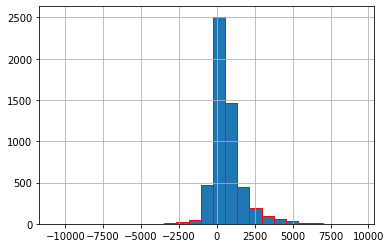

In [133]:
eval_df['residuals'].hist(bins=25, ec='r');

In [134]:
(eval_df['residuals'] < -0).mean()

0.2388281105136288

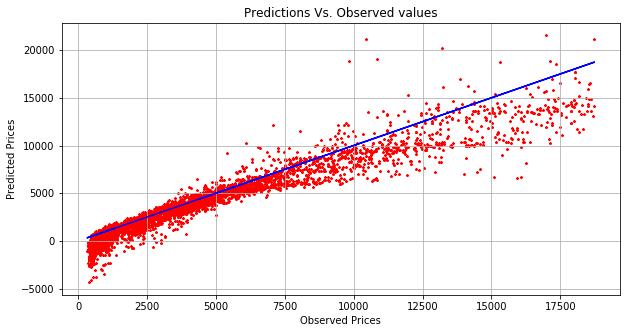

In [135]:
# Visualize the scatter plot of the actual versus the predicted values
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(eval_df['y_true'],eval_df['y_pred'], s= 5, marker = '*', color ='r')
ax.plot(eval_df['y_true'], eval_df['y_true'],color='blue')
ax.set_title('Predictions Vs. Observed values')
ax.set_xlabel('Observed Prices')
ax.set_ylabel('Predicted Prices')
ax.grid();

In [136]:
eval_df['y_pred'].loc[eval_df['y_pred'] < 0][:5]

50993   -540.800660
31703   -275.513814
24039   -833.256055
28197   -693.882786
28507   -793.757107
Name: y_pred, dtype: float64

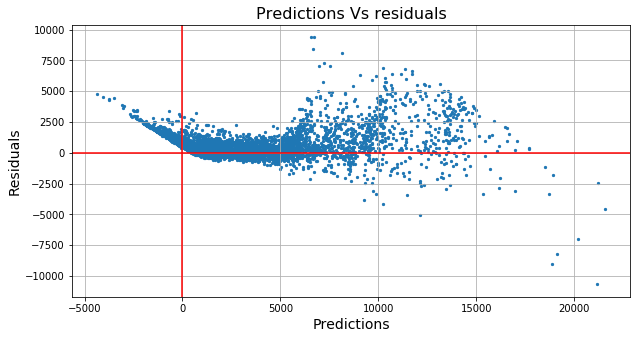

In [137]:
# Residuals is visualizing these with the predicted values:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(eval_df['y_pred'],eval_df['residuals'], s= 5)
ax.set_title('Predictions Vs residuals', fontsize = 16)
ax.set_xlabel('Predictions', fontsize = 14)
ax.set_ylabel('Residuals', fontsize = 14)
ax.axhline(color='r');
ax.axvline(color='r');
ax.grid();

>From this plot, we see that again the model overstimated price(negatibe residuals). We also notice some kind of non-linear pattern between predictions and residulas.

# Model Tunning and Improving Performance

> ## Optimizing a single hyperpara

In [138]:
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.1,random_state=0)

In [139]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [140]:
candidates = np.arange(4,16)
mae_metrics =[]
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k,weights='distance',metric='minkowski',leaf_size=50,n_jobs=4)
    model.fit(X_train,y_train)
    y_pred= model.predict(X_val)
    metric = mean_absolute_error(y_true=y_val,y_pred=y_pred)
    mae_metrics.append(metric)

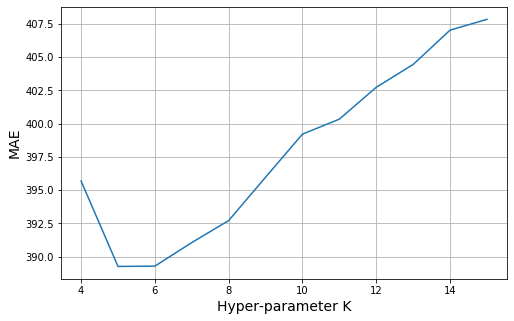

In [141]:
# Visualize the MAE associated with value k:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mae_metrics)
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.grid();

* according to this graph the best value for K is 6

In [142]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 6)

In [143]:
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.fit_transform(x_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [144]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [145]:
candidates = np.arange(4,16)
mean_mae = []
std_mae = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors = k, weights = 'distance',metric ='minkowski',leaf_size = 50, n_jobs =4)
    cv_results = cross_val_score(model,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
    mean_score,std_score = - 1 * cv_results.mean(), cv_results.std()
    mean_mae.append(mean_score)
    std_mae.append(std_score)

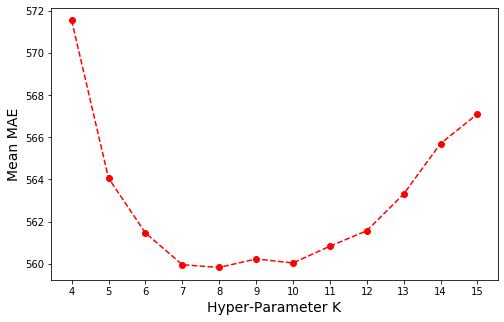

In [146]:
# Let's plot the graph of cross-validation MAE score against k score again
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(candidates, mean_mae , 'o--',color = 'red')
ax.set_xlabel('Hyper-Parameter K', fontsize = 14)
ax.set_ylabel('Mean MAE', fontsize =14)
ax.set_xticks(candidates)
ax.grid
plt.show()

> k = 8 is the best value 

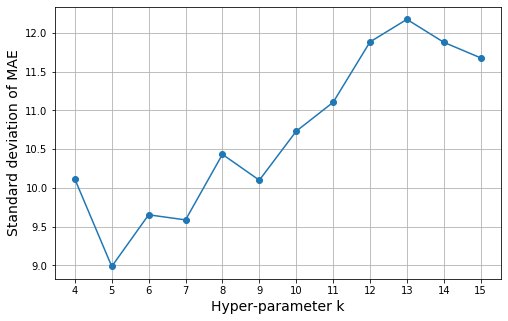

In [147]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(candidates, std_mae, 'o-')
ax.set_xlabel('Hyper-parameter k', fontsize = 14)
ax.set_ylabel('Standard deviation of MAE', fontsize = 14)
ax.set_xticks(candidates)
ax.grid()
plt.show()

> We see that our models show a relatively low variance and that the model with the lowest variance is the one with K=5. From this, we conclude that the optimal parameter for our KNN model is K=5. 

# Improving our diamond price  predictions

In [148]:
from keras.models import Sequential
from keras.layers import Dense

In [149]:
n_input = X_train.shape[1]
n_hidden1 = 32
n_hiddeb2 = 16
n_hidden3 = 8

In [150]:
nn_reg = Sequential()

In [151]:
nn_reg.add(Dense(units = n_hidden1, activation = 'relu', input_shape = (n_input,)))

In [152]:
nn_reg.add(Dense(units = n_hidden2, activation = 'relu'))

In [153]:
nn_reg.add(Dense(units = n_hidden3, activation = 'relu'))

In [154]:
# Output_layer
nn_reg.add(Dense(units = 1, activation = None))

In [155]:
# Now let's compile and train our network
batch_size = 32
n_epochs = 50
nn_reg.compile(loss='mean_absolute_error', optimizer='adam')
nn_reg.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size)
validation_split = 0.05

Epoch 1/50
1517/1517 [==============================] - 7s 1ms/step - loss: 3043.7524
Epoch 2/50
1517/1517 [==============================] - 2s 1ms/step - loss: 2004.3754
Epoch 3/50
1517/1517 [==============================] - 2s 1ms/step - loss: 1302.0762
Epoch 4/50
1517/1517 [==============================] - 2s 1ms/step - loss: 842.8792
Epoch 5/50
1517/1517 [==============================] - 2s 1ms/step - loss: 737.3693
Epoch 6/50
1517/1517 [==============================] - 2s 1ms/step - loss: 700.5912
Epoch 7/50
1517/1517 [==============================] - 2s 1ms/step - loss: 675.6154
Epoch 8/50
1517/1517 [==============================] - 2s 1ms/step - loss: 645.0329
Epoch 9/50
1517/1517 [==============================] - 2s 1ms/step - loss: 598.1431
Epoch 10/50
1517/1517 [==============================] - 2s 1ms/step - loss: 587.8591
Epoch 11/50
1517/1517 [==============================] - 2s 1ms/step - loss: 561.4278
Epoch 12/50
1517/1517 [==============================] - 2s 

In [156]:
# After the neural network  has been trained, we can get the value for the test MAE:
y_pred = nn_reg.predict(X_test)
mae_neural_net = mean_absolute_error(y_test, y_pred)
print('MAE Neural Network : {:0.2f}'.format(mae_neural_net))

MAE Neural Network : 331.78


> **We are getting a test MAE of 331.78, Much better that the optimal KNN model**

# Transform the target 

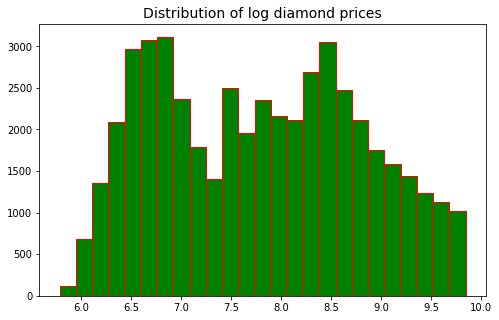

In [157]:
y_train = np.log(y_train)
pd.Series(y_train).hist(bins =25, ec = 'r', figsize = (8, 5), color = 'g')
plt.title("Distribution of log diamond prices", fontsize = 14)
plt.grid(False)
plt.show()

> The distribution is noyt axactly symmetrical, but at least we have addressed the highly skewd distribution of our original target

> Let's fit the same neural network with only the transformed target

In [159]:
batch_size = 32
nn_reg.compile(loss='mean_absolute_error', optimizer='adam')
nn_reg.fit(X_train, y_train, epochs = 40, batch_size = batch_size, validation_split = 0.05)

Epoch 1/40
1441/1441 [==============================] - 12s 8ms/step - loss: 446.0351 - val_loss: 0.6785
Epoch 2/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.6970 - val_loss: 0.6091
Epoch 3/40
1441/1441 [==============================] - 2s 1ms/step - loss: 0.5919 - val_loss: 0.5214
Epoch 4/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.5405 - val_loss: 0.4820
Epoch 5/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.4882 - val_loss: 0.6818
Epoch 6/40
1441/1441 [==============================] - 2s 1ms/step - loss: 0.4421 - val_loss: 0.5187
Epoch 7/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.3706 - val_loss: 0.3364
Epoch 8/40
1441/1441 [==============================] - 3s 2ms/step - loss: 0.2875 - val_loss: 0.2744
Epoch 9/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.2274 - val_loss: 0.1573
Epoch 10/40
1441/1441 [==============================] - 2s 2ms/step - loss: 0.

In [163]:
# Let's calculate price and the MAE
y_pred = nn_reg.predict(X_test).flatten()
# Transformation from log prices to prices
y_pred = np.exp(y_pred)
mae_neural_net2 = mean_absolute_error(y_test, y_pred)
print("MAE Neural Network (modified target) : {:.2f}"
     .format(mae_neural_net2))

MAE Neural Network (modified target) : 465513.87


In [165]:

mask_7500 = y_test <=7500
mae_neural_less_7500 = mean_absolute_error(y_test[mask_7500],
y_pred[mask_7500])
print("MAE considering price <= 7500:{:0.2f}"
      .format(mae_neural_less_7500))


MAE considering price <= 7500:232.03


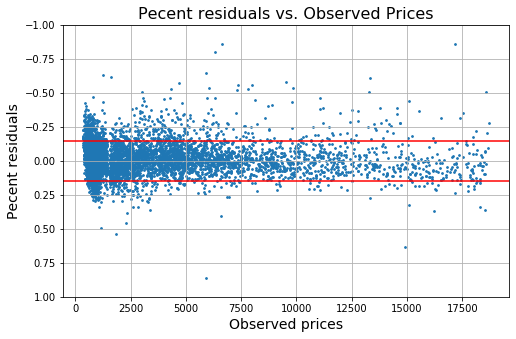

In [167]:
fig, ax = plt.subplots(figsize=(8,5))
percent_residuals = (y_test - y_pred)/y_test
ax.scatter(y_test, percent_residuals, s=3)
ax.set_title('Pecent residuals vs. Observed Prices', fontsize=16)
ax.set_xlabel('Observed prices', fontsize=14)
ax.set_ylabel('Pecent residuals', fontsize=14)
ax.set_ylim(1,-1)
ax.axhline(y=0.15, color='r'); ax.axhline(y=-0.15, color='r');
ax.grid()
plt.show()